<a href="https://colab.research.google.com/github/sumitkushwaha2572/Assignment-123/blob/main/Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [3]:
from google.colab import files
uploaded = files.upload()


Saving Tradexa Internship Assignment_ Data Science - Dataset (1).csv to Tradexa Internship Assignment_ Data Science - Dataset (1).csv


In [4]:
data = pd.read_csv("Tradexa Internship Assignment_ Data Science - Dataset (1).csv")

In [5]:
data.head()

,Fund Number,Market Cap,Type,Risk,Assets,Turnover Ratio(%),SD,Sharpe Ratio,1YrReturn%,3YrReturn%,5YrReturn%,10YrReturn%,Expense Ratio,Star Rating
0,RF040,Large,Growth,Average,8524.94,112.0,9.51,1.91,11.08,19.29,17.00,8.82,0.82,Four
1,RF147,Large,Value,Average,942.15,26.0,10.41,1.88,11.89,18.20,14.60,9.26,0.95,Four
2,RF221,Mid-Cap,Growth,High,374.63,63.4,15.24,1.88,-4.34,12.63,13.02,12.98,1.35,Three
3,RF309,Mid-Cap,Value,Average,1478.08,6.0,9.51,1.86,7.95,16.48,15.15,7.40,0.69,Two
4,RF028,Large,Growth,Average,13634.38,5.0,10.93,1.85,11.52,21.55,19.59,8.83,1.15,Four


In [6]:
# Data Cleaning
# Encoding categorical features
data['Market Cap'] = LabelEncoder().fit_transform(data['Market Cap'])
data['Type'] = LabelEncoder().fit_transform(data['Type'])
data['Risk'] = LabelEncoder().fit_transform(data['Risk'])


In [7]:
# Selecting Features and Target
features = [
    "Market Cap", "Type", "Risk", "Assets", "Turnover Ratio(%)",
    "SD", "Sharpe Ratio", "1YrReturn%", "5YrReturn%", "10YrReturn%", "Expense Ratio"
]

target = '3YrReturn%'

X = data[features]
y = data[target]


In [8]:
X.head()

,Market Cap,Type,Risk,Assets,Turnover Ratio(%),SD,Sharpe Ratio,1YrReturn%,5YrReturn%,10YrReturn%,Expense Ratio
0,0,0,0,8524.94,112.0,9.51,1.91,11.08,17.00,8.82,0.82
1,0,1,0,942.15,26.0,10.41,1.88,11.89,14.60,9.26,0.95
2,1,0,1,374.63,63.4,15.24,1.88,-4.34,13.02,12.98,1.35
3,1,1,0,1478.08,6.0,9.51,1.86,7.95,15.15,7.40,0.69
4,0,0,0,13634.38,5.0,10.93,1.85,11.52,19.59,8.83,1.15


In [9]:
y.head()

,3YrReturn%
0,19.29
1,18.20
2,12.63
3,16.48
4,21.55


In [10]:
print(data.isnull().sum())  # Check missing values
print(data.describe())  # Look for outliers in numerical features


Fund Number          0
Market Cap           0
Type                 0
Risk                 0
Assets               0
Turnover Ratio(%)    0
SD                   0
Sharpe Ratio         0
1YrReturn%           0
3YrReturn%           0
5YrReturn%           0
10YrReturn%          0
Expense Ratio        0
Star Rating          0
dtype: int64
       Market Cap        Type        Risk         Assets  Turnover Ratio(%)  \
count  407.000000  407.000000  407.000000     407.000000         407.000000   
mean     0.675676    0.339066    0.373464    2055.819386          71.802457   
std      0.777119    0.473975    0.660708    6777.361885          89.503894   
min      0.000000    0.000000    0.000000       5.210000           0.000000   
25%      0.000000    0.000000    0.000000     115.385000          29.500000   
50%      0.000000    0.000000    0.000000     413.110000          51.000000   
75%      1.000000    1.000000    1.000000    1492.725000          83.500000   
max      2.000000    1.000000    

In [11]:
# Removing Outliers from Turnover Ratio(%)
# Calculate IQR
Q1 = X["Turnover Ratio(%)"].quantile(0.25)
Q3 = X["Turnover Ratio(%)"].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Apply capping using .loc to avoid SettingWithCopyWarning
X.loc[X["Turnover Ratio(%)"] > upper_bound, "Turnover Ratio(%)"] = upper_bound
X.loc[X["Turnover Ratio(%)"] < lower_bound, "Turnover Ratio(%)"] = lower_bound


In [12]:
print(X.describe())

       Market Cap        Type        Risk         Assets  Turnover Ratio(%)  \
count  407.000000  407.000000  407.000000     407.000000         407.000000   
mean     0.675676    0.339066    0.373464    2055.819386          61.127789   
std      0.777119    0.473975    0.660708    6777.361885          42.695458   
min      0.000000    0.000000    0.000000       5.210000           0.000000   
25%      0.000000    0.000000    0.000000     115.385000          29.500000   
50%      0.000000    0.000000    0.000000     413.110000          51.000000   
75%      1.000000    1.000000    1.000000    1492.725000          83.500000   
max      2.000000    1.000000    2.000000  106837.310000         164.500000   

               SD  Sharpe Ratio  1YrReturn%  5YrReturn%  10YrReturn%  \
count  407.000000    407.000000  407.000000  407.000000   407.000000   
mean    11.394079      1.324644    7.813538   14.303268     7.582113   
std      1.769692      0.296612    5.439464    2.330909     1.709281   


In [13]:
X.corr()  # we are seeing correlation of one features with others so that we handle multicollinearity and remove unwanted features

,Market Cap,Type,Risk,Assets,Turnover Ratio(%),SD,Sharpe Ratio,1YrReturn%,5YrReturn%,10YrReturn%,Expense Ratio
Market Cap,1.000000,-0.088557,0.082976,-0.103868,0.140456,0.622163,-0.552840,-0.613960,0.076746,0.078267,0.401502
Type,-0.088557,1.000000,0.113746,-0.002964,-0.087264,-0.270043,0.155211,0.083862,-0.255628,-0.304422,-0.072662
Risk,0.082976,0.113746,1.000000,-0.021309,-0.098598,0.008805,-0.071587,-0.127993,-0.205797,-0.134525,0.042119
Assets,-0.103868,-0.002964,-0.021309,1.000000,-0.110986,-0.140580,0.170051,0.112491,0.100608,0.156378,-0.257616
Turnover Ratio(%),0.140456,-0.087264,-0.098598,-0.110986,1.000000,0.290830,-0.181661,-0.103980,0.024347,-0.069827,0.246442
SD,0.622163,-0.270043,0.008805,-0.140580,0.290830,1.000000,-0.679167,-0.642617,0.025123,0.067288,0.405402
Sharpe Ratio,-0.552840,0.155211,-0.071587,0.170051,-0.181661,-0.679167,1.000000,0.759803,0.434364,0.173890,-0.458071
1YrReturn%,-0.613960,0.083862,-0.127993,0.112491,-0.103980,-0.642617,0.759803,1.000000,0.316380,0.131833,-0.446052
5YrReturn%,0.076746,-0.255628,-0.205797,0.100608,0.024347,0.025123,0.434364,0.316380,1.000000,0.538756,-0.219664
10YrReturn%,0.078267,-0.304422,-0.134525,0.156378,-0.069827,0.067288,0.173890,0.131833,0.538756,1.000000,-0.235188


In [14]:
X = X.drop(["Type", "Risk", "Expense Ratio"], axis=1)



In [15]:
# Splitting Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
# Scaling Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
# Building All necessary models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "Support Vector Regressor": SVR(),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42),

}

# Train and evaluate each model
results = []
for name, model in models.items():
    model.fit(X_train_scaled, y_train)  # Train model
    y_pred = model.predict(X_test_scaled)  # Predict

    # Evaluate performance
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results.append({"Model": name, "MSE": mse, "R² Score": r2})
    print(f"{name} -> MSE: {mse:.4f}, R²: {r2:.4f}")

Linear Regression -> MSE: 3.2800, R²: 0.6987
Ridge Regression -> MSE: 3.2976, R²: 0.6970
Lasso Regression -> MSE: 3.5291, R²: 0.6758
Decision Tree -> MSE: 4.0319, R²: 0.6296
Random Forest -> MSE: 3.4716, R²: 0.6811
Gradient Boosting -> MSE: 3.3706, R²: 0.6903
Support Vector Regressor -> MSE: 3.8168, R²: 0.6493
XGBoost -> MSE: 4.0395, R²: 0.6289


In [18]:
# Here we are doing hyperparameter tuning using Gridsearhcv to find best paramter for our model

from sklearn.model_selection import GridSearchCV
import xgboost as xgb
ridge_params = {'alpha': [0.01, 0.1, 1, 10, 100]}
rf_params = {'n_estimators': [50, 100, 200], 'max_depth': [None, 5, 10], 'min_samples_split': [2, 5]}
gb_params = {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7]}
xgb_params = {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7]}

# Define models
models = {
    "Ridge": (Ridge(), ridge_params),
    "Random Forest": (RandomForestRegressor(random_state=42), rf_params),
    "Gradient Boosting": (GradientBoostingRegressor(random_state=42), gb_params),
    "XGBoost": (xgb.XGBRegressor(objective="reg:squarederror", random_state=42), xgb_params)
}

# Run GridSearchCV for each model
best_models = {}
for name, (model, params) in models.items():
    grid_search = GridSearchCV(model, params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train_scaled, y_train)
    best_models[name] = grid_search.best_estimator_
    print(f"{name} Best Params: {grid_search.best_params_}")

# Evaluate the best models on test data
from sklearn.metrics import mean_squared_error, r2_score

for name, model in best_models.items():
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{name} -> MSE: {mse:.4f}, R²: {r2:.4f}")

Ridge Best Params: {'alpha': 10}
Random Forest Best Params: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Gradient Boosting Best Params: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 50}
XGBoost Best Params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
Ridge -> MSE: 3.4458, R²: 0.6834
Random Forest -> MSE: 3.4568, R²: 0.6824
Gradient Boosting -> MSE: 3.4185, R²: 0.6859
XGBoost -> MSE: 3.2221, R²: 0.7040


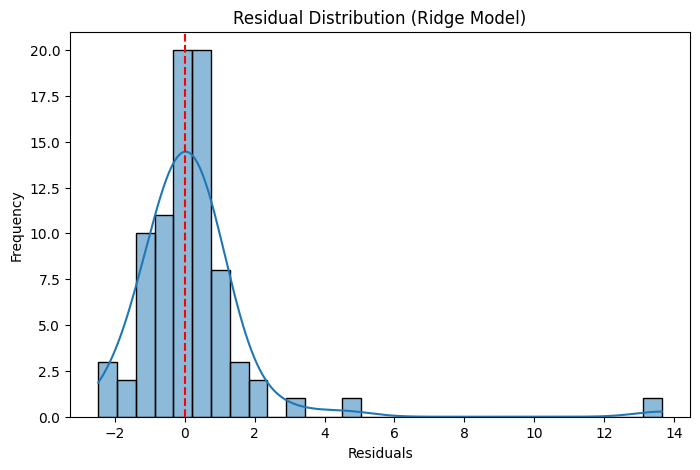

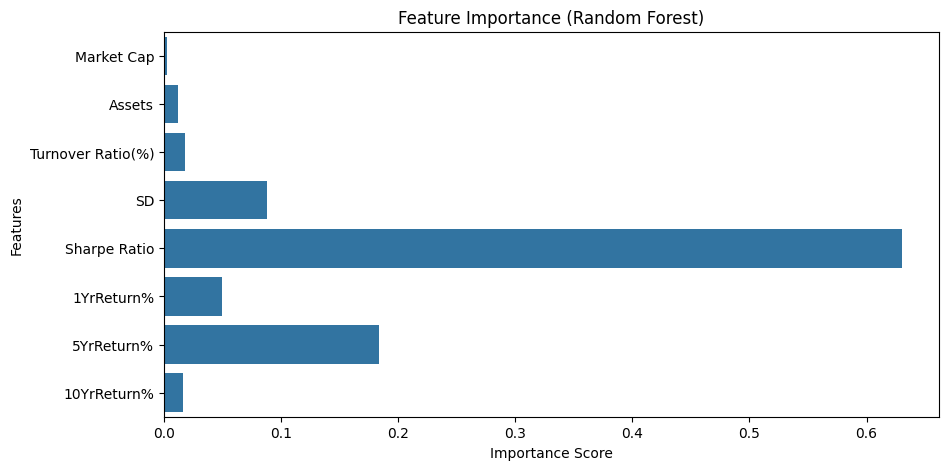

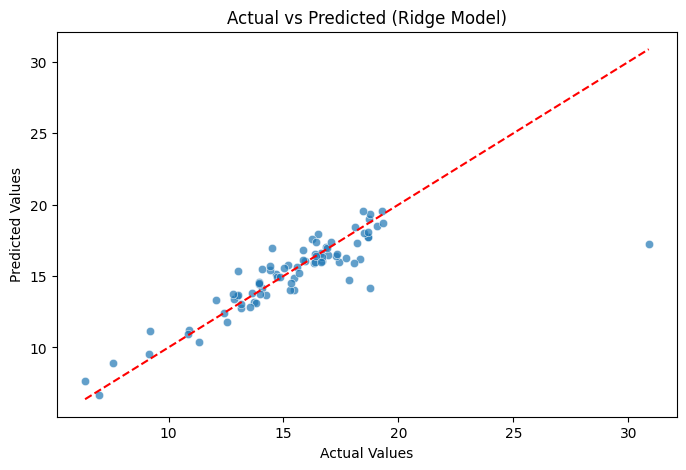

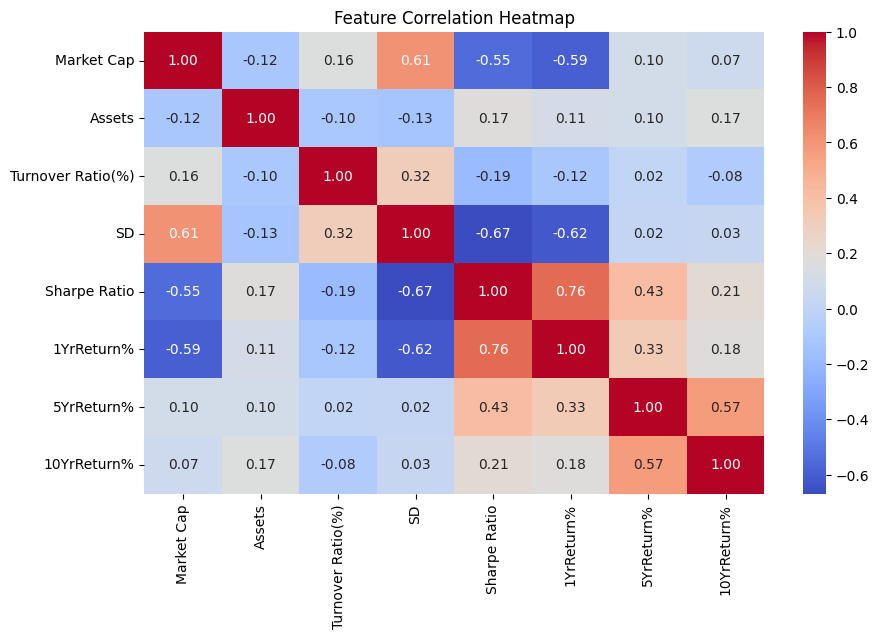

In [20]:
# Doing some Visualization Based on our Model
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. Residual Plot (Using Ridge Best Model)
y_pred = best_models["Ridge"].predict(X_test_scaled)  # Ridge gave best R²
residuals = y_test - y_pred
plt.figure(figsize=(8, 5))
sns.histplot(residuals, bins=30, kde=True)
plt.axvline(0, color='red', linestyle='dashed')
plt.title("Residual Distribution (Ridge Model)")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

# 2. Feature Importance (Using Random Forest)
importances = best_models["Random Forest"].feature_importances_  # Tree-based models only
feature_names = X_train.columns
plt.figure(figsize=(10, 5))
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

# 3. Actual vs. Predicted Scatter Plot (Using Ridge Best Model)
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')  # Reference line
plt.title("Actual vs Predicted (Ridge Model)")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

# 4. Correlation Heatmap (Using Scaled X_train Data)
X_train_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)  # Convert back to DataFrame
plt.figure(figsize=(10, 6))
sns.heatmap(X_train_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()